### The University of Melbourne, School of Computing and Information Systems
# COMP90086 Computer Vision, 2023 Semester 2

## Project

**Student Name:**   `Pangfeng Zheng` `Jiacheng Lu`

**Student ID:**     `1392483`

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
import secrets
import pandas as pd
import cv2

In [3]:
train_data = pd.read_csv('train.csv', header = None)
train_left = train_data.iloc[1:,0]
train_right = train_data.iloc[1:,1]

In [4]:
duplicates = train_left.duplicated(keep=False)

# Filter the 'left' Series to get the duplicated values
duplicated_values = train_left[duplicates]
print(duplicated_values)

Series([], Name: 0, dtype: object)


In [5]:
duplicates = train_right.duplicated(keep=False)

# Filter the 'left' Series to get the duplicated values
duplicated_values = train_right[duplicates]
print(duplicated_values)

Series([], Name: 1, dtype: object)


In [6]:
common_elements = train_left[train_left.isin(train_right)]

# Print the common elements
print(common_elements)

Series([], Name: 0, dtype: object)


In [7]:
trainImages_left_dir = 'train/left'
left_images = []
for i in train_left:
    image_path = trainImages_left_dir+'/'+i+".jpg"
    image = cv2.imread(image_path)
    left_images.append(image)

In [8]:
trainImages_right_dir = 'train/right'
right_images = []
for i in train_right:
    image_path = trainImages_right_dir+'/'+i+".jpg"
    image = cv2.imread(image_path)
    right_images.append(image)

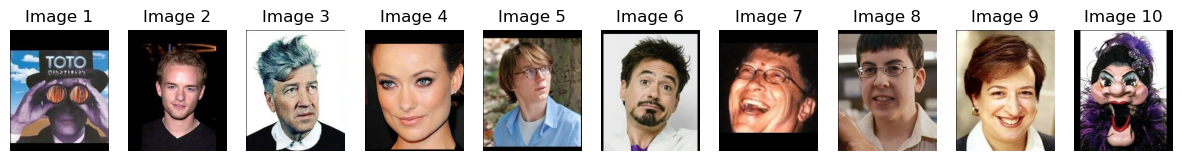

In [9]:
num_images = 10
fig, axes = plt.subplots(1, 10, figsize=(15, 5))
for i in range(10):
    axes[i].imshow(cv2.cvtColor(left_images[i], cv2.COLOR_BGR2RGB))
    axes[i].set_title(f'Image {i+1}')
    axes[i].axis('off')  # Turn off axis labels
    

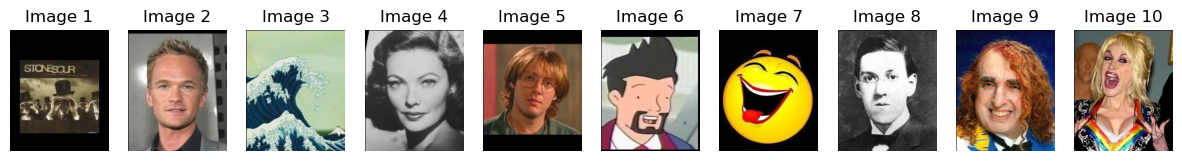

In [10]:
num_images = 10
fig, axes = plt.subplots(1, 10, figsize=(15, 5))
for i in range(10):
    axes[i].imshow(cv2.cvtColor(right_images[i], cv2.COLOR_BGR2RGB))
    axes[i].set_title(f'Image {i+1}')
    axes[i].axis('off')  # Turn off axis labels

In [14]:
cnn = keras.Sequential(
    [
        layers.Input((200, 245, 3)),
        
        layers.Conv2D(16, (3, 3), activation='relu'),
        layers.Conv2D(16, (3, 3), activation='relu'),
        
        layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='softmax')
    ], 
)

cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 198, 243, 16)      448       
                                                                 
 conv2d_3 (Conv2D)           (None, 196, 241, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 98, 120, 16)      0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 188160)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                12042304  
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                      

In [15]:
cnn.compile(optimizer='Adam',
            loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
            metrics=['accuracy'])

In [18]:
cnn.fit(x=left_images[:50], y=right_images[:50], epochs=50, validation_data=(left_images[51:100], right_images[51:100]),batch_size=1)

Epoch 1/50


ValueError: in user code:

    File "D:\anaconda\envs\CV2\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "D:\anaconda\envs\CV2\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\anaconda\envs\CV2\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "D:\anaconda\envs\CV2\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "D:\anaconda\envs\CV2\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "D:\anaconda\envs\CV2\lib\site-packages\keras\engine\input_spec.py", line 217, in assert_input_compatibility
        f'Layer "{layer_name}" expects {len(input_spec)} input(s),'

    ValueError: Layer "sequential_1" expects 1 input(s), but it received 50 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(1, 200, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1' shape=(1, 200, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:2' shape=(1, 200, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:3' shape=(1, 200, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:4' shape=(1, 200, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:5' shape=(1, 200, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:6' shape=(1, 200, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:7' shape=(1, 200, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:8' shape=(1, 200, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:9' shape=(1, 200, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:10' shape=(1, 200, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:11' shape=(1, 200, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:12' shape=(1, 200, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:13' shape=(1, 200, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:14' shape=(1, 200, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:15' shape=(1, 200, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:16' shape=(1, 200, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:17' shape=(1, 200, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:18' shape=(1, 200, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:19' shape=(1, 200, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:20' shape=(1, 200, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:21' shape=(1, 200, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:22' shape=(1, 200, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:23' shape=(1, 200, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:24' shape=(1, 200, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:25' shape=(1, 200, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:26' shape=(1, 200, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:27' shape=(1, 200, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:28' shape=(1, 200, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:29' shape=(1, 200, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:30' shape=(1, 200, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:31' shape=(1, 200, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:32' shape=(1, 200, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:33' shape=(1, 200, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:34' shape=(1, 200, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:35' shape=(1, 200, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:36' shape=(1, 200, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:37' shape=(1, 200, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:38' shape=(1, 200, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:39' shape=(1, 200, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:40' shape=(1, 200, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:41' shape=(1, 200, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:42' shape=(1, 200, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:43' shape=(1, 200, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:44' shape=(1, 200, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:45' shape=(1, 200, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:46' shape=(1, 200, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:47' shape=(1, 200, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:48' shape=(1, 200, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:49' shape=(1, 200, 3) dtype=uint8>]
